---
title: 'Drawing Molecules with Datamol'
subtitle: 'Drawing RDKit molecules easier'
author: 'Tony E. Lin'
date: '2024-03-28'
categories: [RDKit, Datamol, Drawing]
---

## Intro

In the [last post](https://tlint101.github.io/practice-in-code/posts/10-Draw-Molecules.html) I talked about drawing molecules using RDKit. Anyone in cheminformatics knows about RDKit. It is an essential toolkit. But for anyone starting out, it can be frustrating. Think about the basic drawing steps explained in the last post - define the smiles string, convert it into an RDKit molecule (Chem.MolFromSmiles), and then draw the molecule (Draw.MolToImage). That requires three lines of code each time. Trying to find specific tools within RDKit's documentation can be a day daunting and frustrating.

Enter [Datamol](https://docs.datamol.io/stable/tutorials/The_Basics.html). This is a toolkit built on top of RDKit. It reduces the molecular drawing steps from three lines of code into one! 

That makes Datamol is a great tool to start out with. Datamol has a lot of functions ripped right from RDKit and reduces a lot of RDKit's bulkiness into one or two lines of code. That makes Datamol perfect for beginners. But this comes with a caveat. Datamol lacks certain features, drawn molecules can be oriented differently compared to RDKit, and Datamol lacks more detailed tools found in RDKit tool. But for most of our needs, like drawing molecules, Datamol makes perfect sense to use.  

Here, we will go over the same drawing skills as the last post. Only this time we use Datamol to draw the molecules. 

<center><img src="img/datamol_example.png"/></center>

## Set Up Data

Again, we will focus on 2 molecules - Acetylsalicylic Acid and Ibuprofen. The data is set up as follows:

In [2]:
data = {'name': ['Acetylsalicylic Acid', 'Ibuprofen'],
        'smiles': ['O=C(C)Oc1ccccc1C(=O)O', 'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O']}
df = pd.DataFrame(data=data)
df

,name,smiles
0,Acetylsalicylic Acid,O=C(C)Oc1ccccc1C(=O)O
1,Ibuprofen,CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O


## Drawing the Molecule

Like in the last post, the data is loaded in a DataFrame. It will need to be "sliced" for drawing. In this case, we will use Datamol's to_mol() function. This works in one line of code, unlike RDKit which can take two lines. 

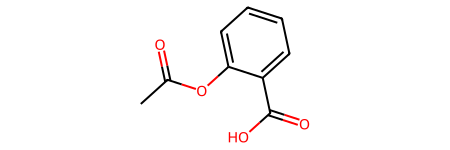

In [3]:
# Get smiles for 1 molecule smiles string
aspirin = df.iloc[0, 1]

# Draw molecule
mol = dm.to_mol(aspirin)
mol

The above code is technically not a drawing. What it is is a representation of an RDKit molecule. You can try that yourself by using type(mol). You will get 'rdkit.Chem.rdchem.Mol'. But the to_mol() is great because the molecule is essentially an RDKit molecule and can be processed using RDKit's other functions or functions available in Datamol. 


Drawing a molecule in Datamol is as simple as using to_image() function. Again, this reads more like traditional English syntax. Here we will draw the molecule as an image. To top it off, we will also add a figure legend for the image. 

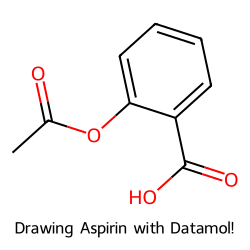

In [4]:
# Input smiles string and figure legend
mol = dm.to_image(aspirin, legends='Drawing Aspirin with Datamol!', use_svg=False, outfile='img/datamol_example.png', mol_size=(250,250))
mol

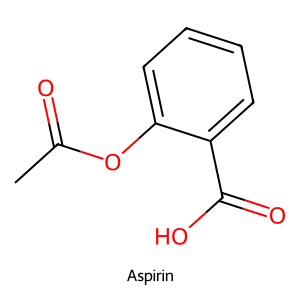

In [5]:
# Input smiles string and figure legend
mol = dm.to_image(aspirin, legends='Aspirin')
mol

That looks great! You can also save the image by adding the "outfile" argument. By default, the image will be in .svg format and if you prefer .png, you should also include "useSVG=False" in the parameters too. There are a lot of options and you can dive into them [here](https://docs.datamol.io/stable/api/datamol.viz.html#datamol.viz.to_image). 

## Drawing Molecules in a Grid

That is all well and good, but what if you want to draw multiple molecules in a grid? Again, that can be accomplished in a single line of code! Even easier, it is done using the same to_image() function!  

The main thing to keep in mind is that the to_image() function requires the inputs to be in a list. That is easy to do from our DataFrame. Here we will draw the two molecules with their figure legend in a grid by converting their respective columns into a list. 

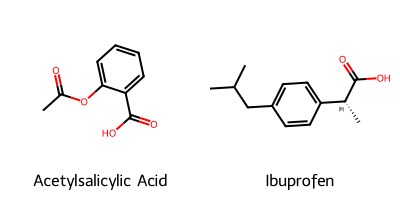

In [6]:
# Convert the smiles column and name columns into a list
mols = df['smiles'].tolist()
legends = df['name'].to_list()

# Draw the molecules!
dm.to_image(mols=mols, legends=legends, n_cols=2, mol_size=(200,200))

This is subjective, but I think that code reads a lot smoother, especially if you are a native English speaker. Compare that to the way I drew molecules from a list from the previous post:

```python
mols = [Chem.MolFromSmiles(mol) for mol in df['smiles']]
MolsToGridImage(mols, legends=['aspirin', 'Ibuprofen'])
```

I am used to it now, but starting out, that read like a whole different langauge to me! Drawing in Datamol makes more sense, especially with their to_image() script. 

## Additional Tools

These are simple drawing examples. If you dive deeper into their [API](https://docs.datamol.io/stable/api/datamol.align.html), you will find that Datamol contains a ton of other useful features. Importantly, they are written in a way that makes a little more sense. Some other things that are important for the cheminformatic toolkit include molecular fingerprints or converting drawn molecules into other 1D formats. Again, Datamol offers a syntax that follows the "to_xxx" format. A lot easier for early coders! 

**At least for the simple things.** If you need more rigorous tools, then you'll have to continue diving into RDKit or other toolkits available. 

## Conclusion

Just know that there are a lot of additional drawing options. If you could not tell, I like drawing images and plan on writing more depending on my schedule. In the meantime, it is good to practice these and thinking about how to add more functionality to it.

With RDKit, there are some easy to use tools baked in. You just need to know the right ingredients! 

The full notebook with the code can be found [here](https://github.com/tlint101/practice-in-code/blob/main/notebooks/10-Draw-Molecules.ipynb). 